In [43]:
import matplotlib.pyplot as plt
import pandas as pd
#магическая команда, указывает, что графики нужно строить прямо в ноутбуке: 
%matplotlib inline

In [44]:
df = pd.read_csv('football.csv')
df = df.drop('Unnamed: 0', axis=1) # Посчитал лишним и неинформативным столбцом
df


,Name,Age,Nationality,Club,Value,Wage,Position,Crossing,Finishing,HeadingAccuracy,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,Argentina,FC Barcelona,110500000,565000,RF,84,95,70,...,75,96,33,28,26,6,11,15,14,8
1,Cristiano Ronaldo,33,Portugal,Juventus,77000000,405000,ST,84,94,89,...,85,95,28,31,23,7,11,15,14,11
2,Neymar Jr,26,Brazil,Paris Saint-Germain,118500000,290000,LW,79,87,62,...,81,94,27,24,33,9,9,15,15,11
3,De Gea,27,Spain,Manchester United,72000000,260000,GK,17,13,21,...,40,68,15,21,13,90,85,87,88,94
4,K. De Bruyne,27,Belgium,Manchester City,102000000,355000,RCM,93,82,55,...,79,88,68,58,51,15,13,5,10,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12892,J. Lundstram,19,England,Crewe Alexandra,1100000,1000,CM,34,38,40,...,43,45,40,48,47,10,13,7,8,9
12893,N. Christoffersson,19,Sweden,Trelleborgs FF,60000,1000,ST,23,52,52,...,43,42,22,15,19,10,9,9,5,12
12894,B. Worman,16,England,Cambridge United,60000,1000,ST,25,40,46,...,55,41,32,13,11,6,5,10,6,13
12895,D. Walker-Rice,17,England,Tranmere Rovers,60000,1000,RW,44,50,39,...,50,46,20,25,27,14,6,14,8,9


In [49]:
df.info() # Нет пропусков в данных, если бы были, то нужно использовать DataFrame.fillna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12897 entries, 0 to 12896
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             12897 non-null  object
 1   Age              12897 non-null  int64 
 2   Nationality      12897 non-null  object
 3   Club             12897 non-null  object
 4   Value            12897 non-null  int64 
 5   Wage             12897 non-null  int64 
 6   Position         12897 non-null  object
 7   Crossing         12897 non-null  int64 
 8   Finishing        12897 non-null  int64 
 9   HeadingAccuracy  12897 non-null  int64 
 10  ShortPassing     12897 non-null  int64 
 11  Volleys          12897 non-null  int64 
 12  Dribbling        12897 non-null  int64 
 13  Curve            12897 non-null  int64 
 14  FKAccuracy       12897 non-null  int64 
 15  LongPassing      12897 non-null  int64 
 16  BallControl      12897 non-null  int64 
 17  Acceleration     12897 non-null

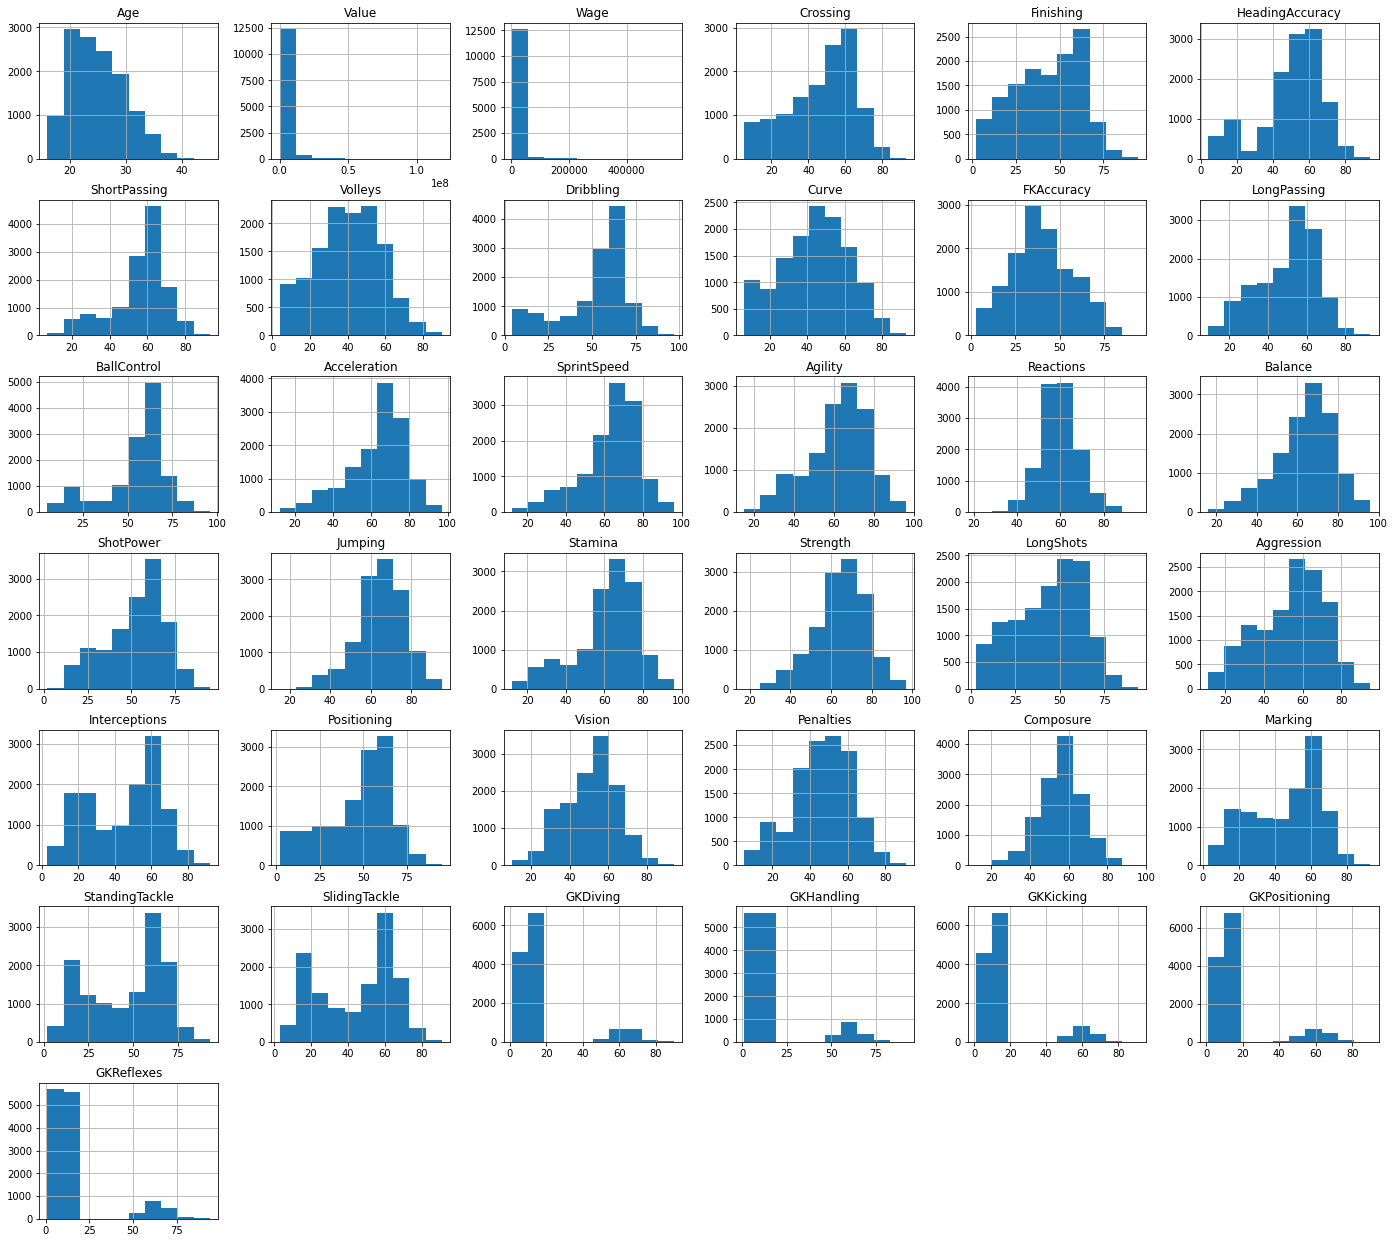

In [53]:
# Визуализации
df.hist(figsize=(24, 22));
# На этой визуализации изображены гистограммы по всем столбцам датасета
# Мы можем сделать выводы по датасету в целом или по отдельной фиче
# Например, для гистограммы Age видно, что большая часть футболистов находится в возрасте от 20 до 30 лет
# А для гистограмм GK... наблюдаем, что лишь небольшая часть вратарей показывает отличные результаты по характеристикам,
# в то время, как общая масса не имеет столь высоких показателей.

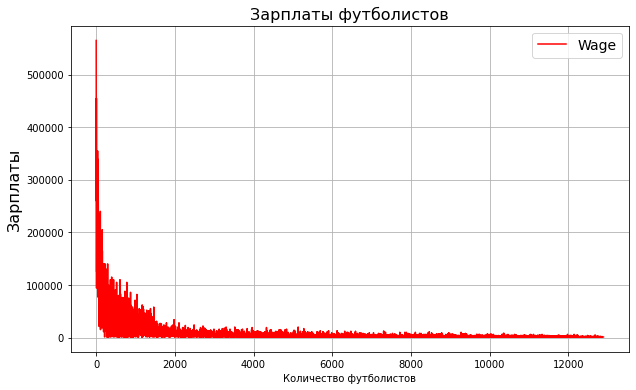

In [72]:
# инициализируем фигуру и указываем ее размер
plt.figure(figsize=(10, 6))

# название графика
plt.title('Зарплаты футболистов', fontsize=16)

# строим график
plt.plot(df.Wage, color='red', linestyle='-', label='Wage')

# настраиваем подписи осей
plt.ylabel('Зарплаты', fontsize=16)
plt.xlabel('Количество футболистов')
# включаем легенду и сетку
plt.legend(fontsize=14)
plt.grid()

# Зарплаты футболистов могут различаться очень значительно => 
# => лишь единицы обладают з/п в год более, чем 400,000 в год. Видно, что порядка 90% футболистов имеют з/п менее, чем 100,000 в год

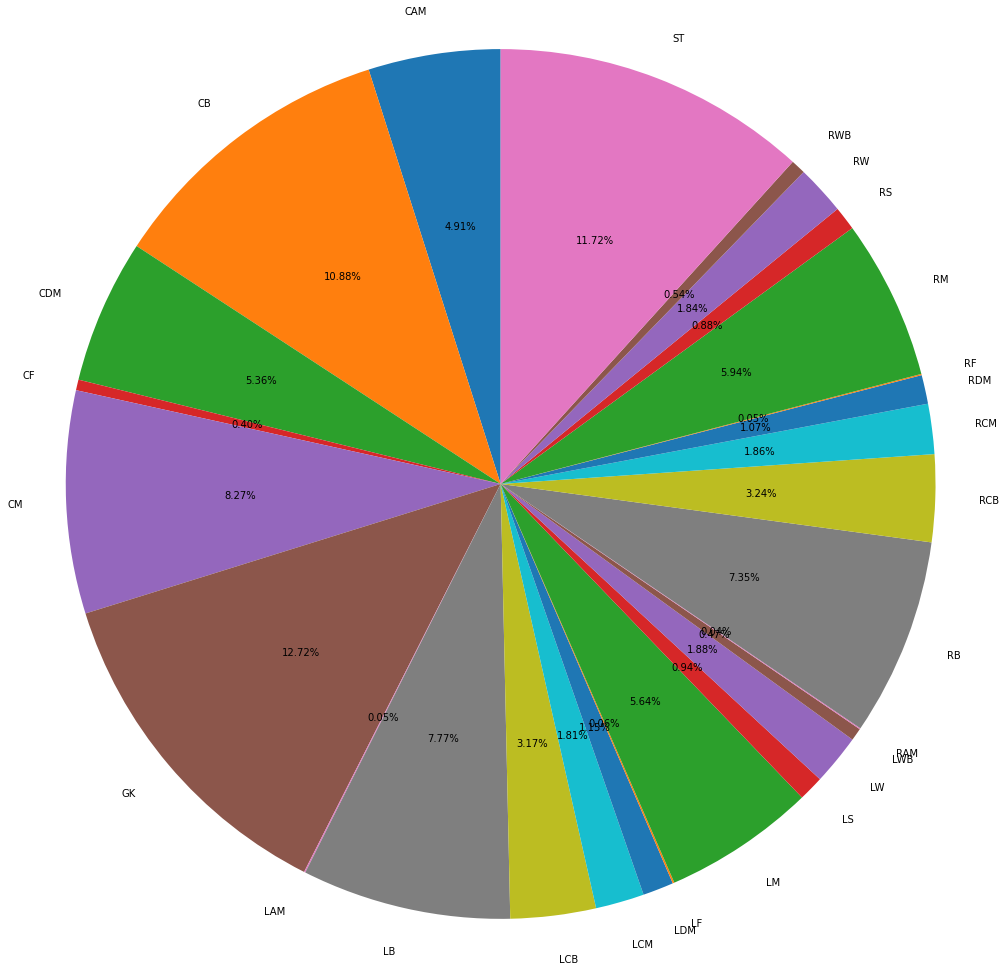

In [115]:
data = pd.get_dummies(df.Position)
labels = data.sum().index[:]
plt.pie(data.sum(), labels=labels, autopct='%1.2f%%', radius=5, startangle=90)
plt.show()
# На круговой диаграмме представлены все возможные позиции игроков
# Около 1/3 при этом приходится на позиции: GK, ST, CB (12.72%, 11.72%, 10.88% соотв.)